Importing titanic dataset

In [1]:
import seaborn as sns

lab2_data = sns.load_dataset('titanic')
lab2_data

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,male,27.0,0,0,13.0000,S,Second,man,True,NaN,Southampton,no,True
887,1,1,female,19.0,0,0,30.0000,S,First,woman,False,B,Southampton,yes,True
888,0,3,female,NaN,1,2,23.4500,S,Third,woman,False,NaN,Southampton,no,False
889,1,1,male,26.0,0,0,30.0000,C,First,man,True,C,Cherbourg,yes,True


Let's start by using a bar graph to investigate whether the type of booking (first class, second class, third class) on the Titanic may be related to passengers' mean survival rate.

<Axes: xlabel='class', ylabel='survived'>

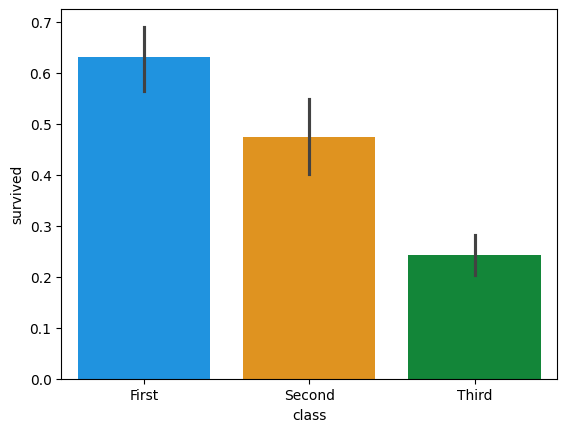

In [2]:
custom_palette = ['#0099ff', '#ff9900', '#009933']

sns.barplot(data=lab2_data, x='class', y='survived', palette=custom_palette, hue='class')

Next, let's investigate whether an individual was a man, woman, or child could be a factor that influenced passengers' survival rates too

<Axes: xlabel='class', ylabel='survived'>

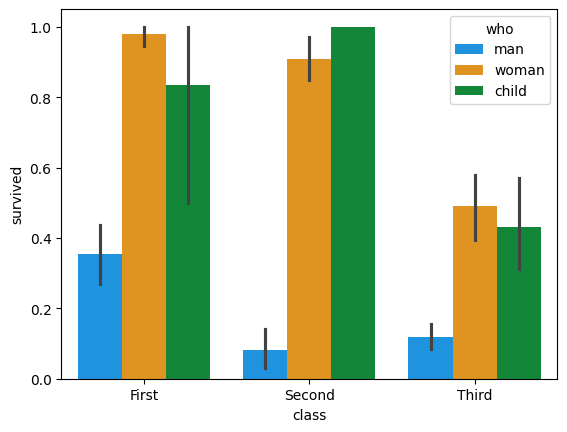

In [3]:
sns.barplot(data=lab2_data, x='class', y='survived', palette=custom_palette, hue='who')

Let's see if this type of difference is also present among children by seperating them into boys and girls.

In [4]:
import pandas as pd
lab2_data.loc[(lab2_data['who'] == 'child') & (lab2_data['sex'] == 'male'), 'who'] = 'boy'
lab2_data.loc[(lab2_data['who'] == 'child') & (lab2_data['sex'] == 'female'), 'who'] = 'girl'

<Axes: xlabel='class', ylabel='survived'>

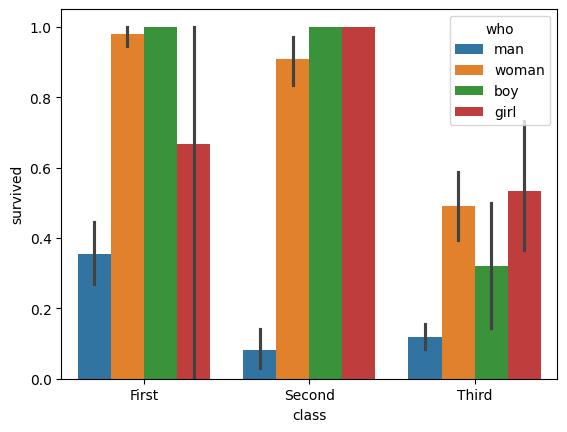

In [5]:
sns.barplot(data=lab2_data, x='class', y='survived', hue='who')

Now that we've obtained a graph we might want to share, let's adjust it to the following arbritrary specifications to practice your Seaborn skills:

Error bars should represent 90% confidence intervals
The error bars should have whiskers that have a length of 0.05

<Axes: xlabel='class', ylabel='survived'>

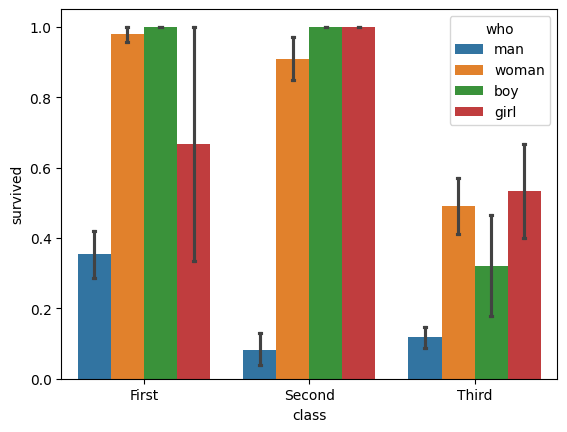

In [6]:
sns.barplot(data=lab2_data, x='class', y='survived', hue='who', capsize=0.05, errorbar=('ci', 90))

Let's now take a closer look at the passengers themselves by plotting the ages of those who survived and those who didn't.

<Axes: xlabel='survived', ylabel='age'>

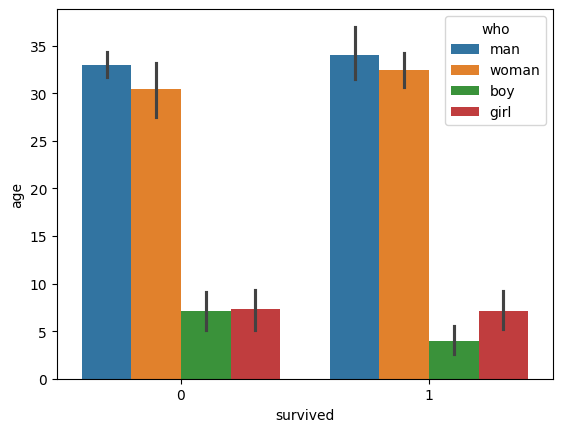

In [7]:
sns.barplot(data=lab2_data, x='survived', y='age', hue='who', hue_order=['man', 'woman', 'boy', 'girl'])


The first improvement we can make here is to rename the x-axis values of 0 and 1 to 'no' and 'yes' respectively. This will help clarify the meaning of both categories.

In [8]:
lab2_data.loc[(lab2_data['survived'] == 0), 'survived_str'] = 'no'
lab2_data.loc[(lab2_data['survived'] == 1),  'survived_str'] = 'yes'
lab2_data

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone,survived_str
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False,no
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False,yes
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True,yes
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False,yes
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,male,27.0,0,0,13.0000,S,Second,man,True,NaN,Southampton,no,True,no
887,1,1,female,19.0,0,0,30.0000,S,First,woman,False,B,Southampton,yes,True,yes
888,0,3,female,NaN,1,2,23.4500,S,Third,woman,False,NaN,Southampton,no,False,no
889,1,1,male,26.0,0,0,30.0000,C,First,man,True,C,Cherbourg,yes,True,yes


<Axes: xlabel='survived_str', ylabel='age'>

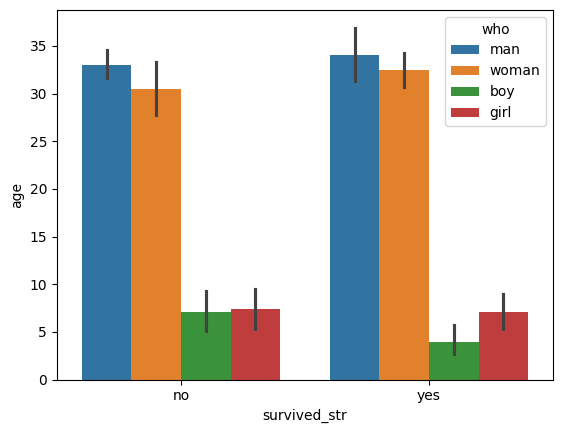

In [9]:
sns.barplot(data=lab2_data, x='survived_str', y='age', hue='who', hue_order=['man', 'woman', 'boy', 'girl'])

Now that we've again obtained a graph we might want to share, let's adjust it to the following arbritrary specifications for practice:

Error bars should represent standard deviation
The error bars should have whiskers that have a length of 0.05
Instead of the sample mean, the bars should represent the sample median

<Axes: xlabel='survived', ylabel='age'>

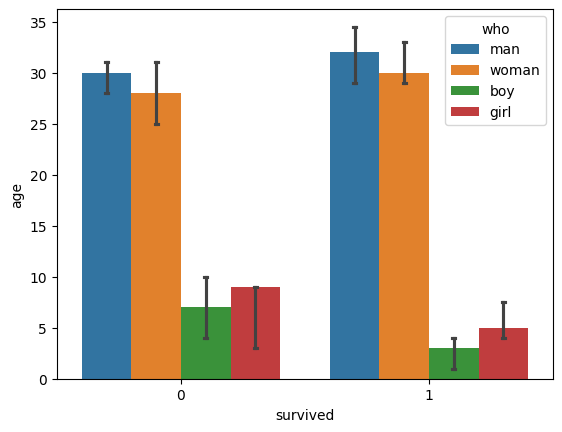

In [10]:
import numpy as np
sns.barplot(data=lab2_data, x='survived', y='age', hue='who', estimator = np.median , errorbar=('ci', 90), capsize=0.05, hue_order=['man', 'woman', 'boy', 'girl'])


Using boxplot

<Axes: xlabel='survived', ylabel='age'>

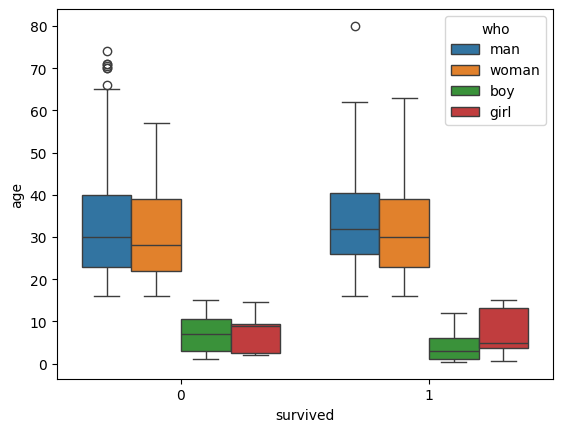

In [11]:
sns.boxplot(data=lab2_data, x='survived', y='age', hue='who', hue_order=['man', 'woman', 'boy', 'girl'])

Next, let's produce a strip plot version of this graph with datapoints that are half-transparent and jitter set to 0.3 .

Since the position of datapoints on strip plots are randomized, your graph should look similar, but not exactly like this:

<Axes: xlabel='survived', ylabel='age'>

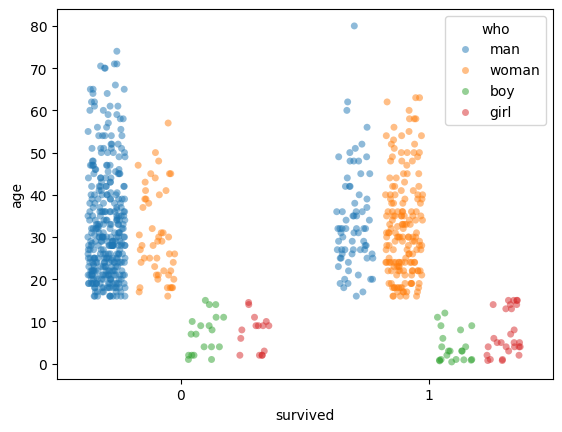

In [12]:
sns.stripplot(data=lab2_data, x='survived', y='age', hue='who', jitter=0.3, alpha=0.5, dodge='true', hue_order=['man', 'woman', 'boy', 'girl'])

Lab 5.1

In [13]:
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt

lab3_data = sns.load_dataset('titanic')
lab3_data.loc[(lab3_data['who'] == 'child') & (lab3_data['sex'] == 'male'), 'who'] = 'boy'
lab3_data.loc[(lab3_data['who'] == 'child') & (lab3_data['sex'] == 'female'), 'who'] = 'girl'
lab3_data.loc[lab3_data['survived'] == 0, 'survived_str'] = 'no'
lab3_data.loc[lab3_data['survived'] == 1,  'survived_str'] = 'yes'

In [14]:
sns.set_style("white")
sns.set_context("paper")

color_order = {'man':'blue','woman':'tab:orange','boy':'cornflowerblue','girl':'sandybrown'}

In [15]:
lab3_data.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone,survived_str
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False,no
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False,yes
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True,yes
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False,yes
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True,no


Plot #1

<Axes: xlabel='class', ylabel='survived'>

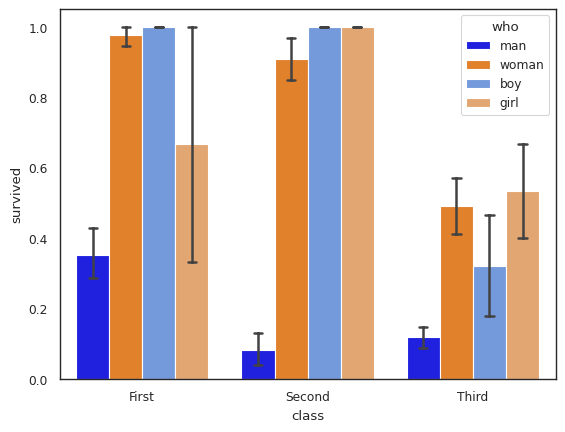

In [16]:
sns.barplot(data=lab3_data, x='class', y='survived', hue='who', palette=color_order, errorbar=('ci', 90), capsize=0.2)


Next, to better contrast between the richest and poorest individuals on the Titanic, let's remove the 'Second' class category by using a custom x-axis order.

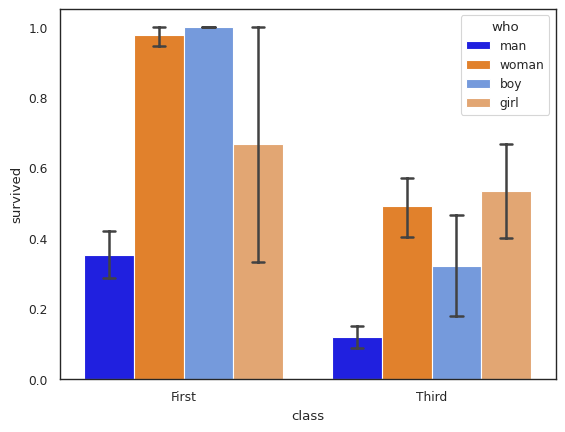

In [17]:
filtered_data = lab3_data[lab3_data['class'] != 'Second']

x_order = ['First', 'Third']

Plot1 = sns.barplot(data=filtered_data, x='class', y='survived', hue='who', order=x_order, palette=color_order, errorbar=('ci', 90), capsize=0.2)

Let's now set the plot's xlabel to 'Boarding Class' and ylabel to 'Mean survival 'rate'

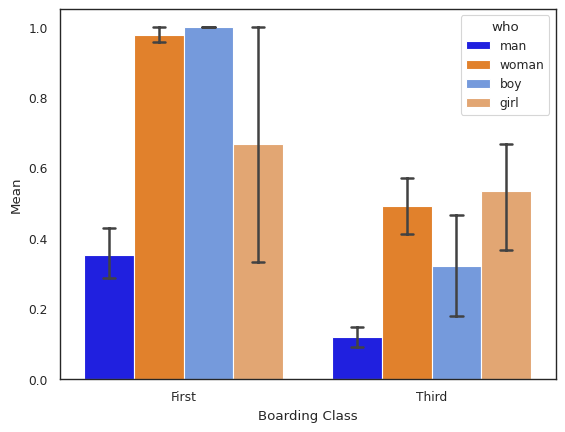

In [18]:
Plot1 = sns.barplot(data=filtered_data, x='class', y='survived', hue='who', order=x_order, palette=color_order, errorbar=('ci', 90), capsize=0.2)

Plot1.set(xlabel='Boarding Class', ylabel='Mean')
plt.show()

Despine

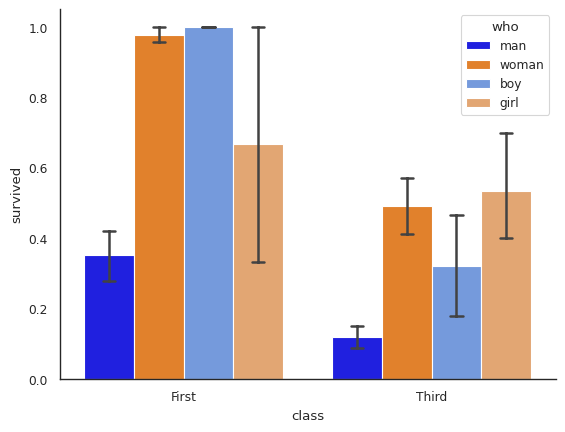

In [19]:
sns.barplot(data=filtered_data, x='class', y='survived', hue='who', order=x_order, palette=color_order, errorbar=('ci', 90), capsize=0.2)
sns.despine()

Plot #2

In [20]:
lab3_data = sns.load_dataset('titanic')
lab3_data.loc[(lab3_data['who'] == 'child') & (lab3_data['sex'] == 'male'), 'who'] = 'boy'
lab3_data.loc[(lab3_data['who'] == 'child') & (lab3_data['sex'] == 'female'), 'who'] = 'girl'
lab3_data.loc[lab3_data['survived'] == 0, 'survived_str'] = 'no'
lab3_data.loc[lab3_data['survived'] == 1,  'survived_str'] = 'yes'

colorless = {'man':'white','woman':'white','boy':'white','girl':'white'}

color_order = {'man':'blue','woman':'tab:orange','boy':'cornflowerblue','girl':'sandybrown'}

<Axes: xlabel='survived_str', ylabel='age'>

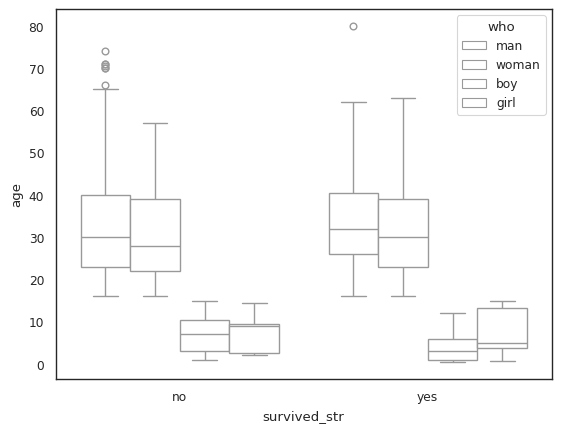

In [21]:
sns.boxplot(data=lab3_data, x='survived_str', y='age', hue='who', hue_order=['man', 'woman', 'boy', 'girl'], palette=colorless)

Old strip plot using new color scheme

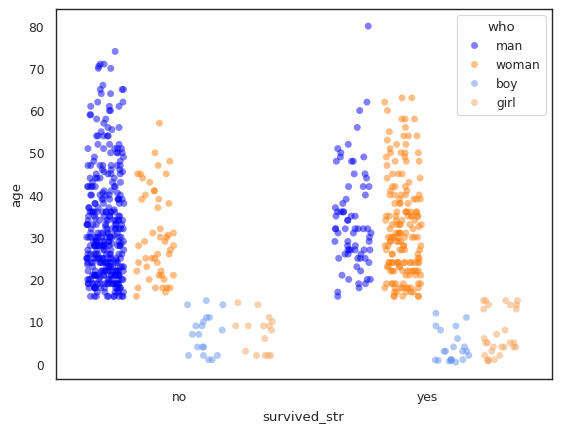

In [22]:
axes2 = sns.stripplot(data=lab2_data, x='survived_str', y='age', hue='who', jitter=0.3, alpha=0.5, dodge='true', hue_order=['man', 'woman', 'boy', 'girl'], palette=color_order)

<ipython-input-23-cf8b5333e19e>:1: UserWarning: 
The palette list has fewer values (1) than needed (4) and will cycle, which may produce an uninterpretable plot.
  axes2 = sns.boxplot(data=lab3_data, x='survived_str', y='age', hue='who', hue_order=['man', 'woman', 'boy', 'girl'], palette=['none'], boxprops=dict(facecolor='none', edgecolor='black'))


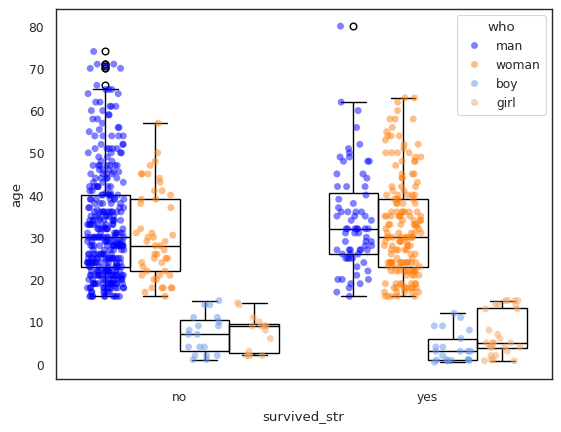

In [23]:
axes2 = sns.boxplot(data=lab3_data, x='survived_str', y='age', hue='who', hue_order=['man', 'woman', 'boy', 'girl'], palette=['none'], boxprops=dict(facecolor='none', edgecolor='black'))
axes2 = sns.stripplot(data=lab2_data, x='survived_str', y='age', hue='who', jitter=0.3, alpha=0.5, dodge='true', hue_order=['man', 'woman', 'boy', 'girl'], palette=color_order)

handles, labels = axes2.get_legend_handles_labels()
plt.legend(handles[4:8], labels[4:8], title='who')

Both plots combined

<ipython-input-24-b6d6eb1202b2>:1: UserWarning: 
The palette list has fewer values (1) than needed (4) and will cycle, which may produce an uninterpretable plot.
  axes2 = sns.boxplot(data=lab3_data, x='survived_str', y='age', hue='who', hue_order=['man', 'woman', 'boy', 'girl'], palette=['none'], boxprops=dict(facecolor='none', edgecolor='black'), zorder=5)


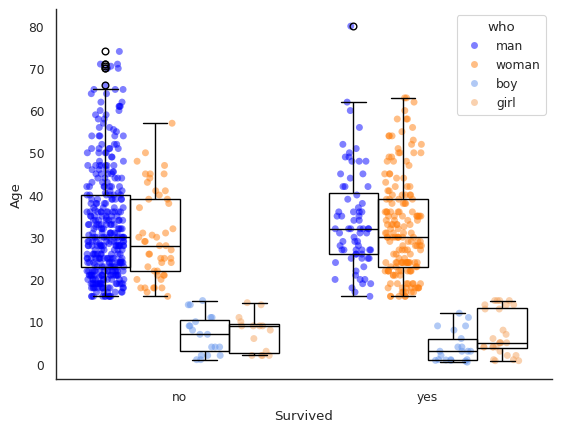

In [24]:
axes2 = sns.boxplot(data=lab3_data, x='survived_str', y='age', hue='who', hue_order=['man', 'woman', 'boy', 'girl'], palette=['none'], boxprops=dict(facecolor='none', edgecolor='black'), zorder=5)
axes2 = sns.stripplot(data=lab2_data, x='survived_str', y='age', hue='who', jitter=0.3, alpha=0.5, dodge='true', hue_order=['man', 'woman', 'boy', 'girl'], palette=color_order, zorder=0)

axes2.set(xlabel='Survived', ylabel='Age')

sns.despine()

handles, labels = axes2.get_legend_handles_labels()
plt.legend(handles[4:8], labels[4:8], title='who')

Plot 3

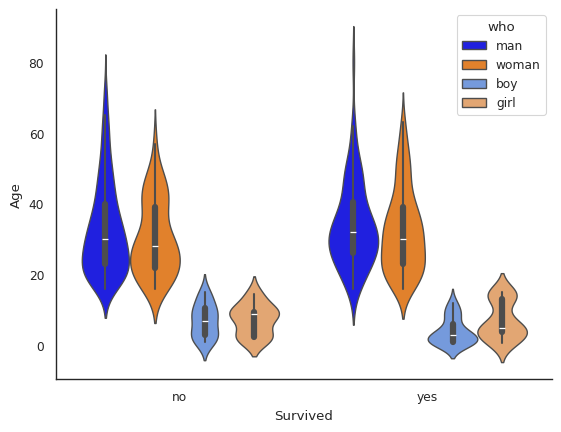

In [25]:
plot3 = sns.violinplot(data=lab3_data, x='survived_str', y='age', hue='who', hue_order=['man', 'woman', 'boy', 'girl'], palette=color_order)
plot3.set(xlabel='Survived', ylabel='Age')
sns.despine()

Plot 4

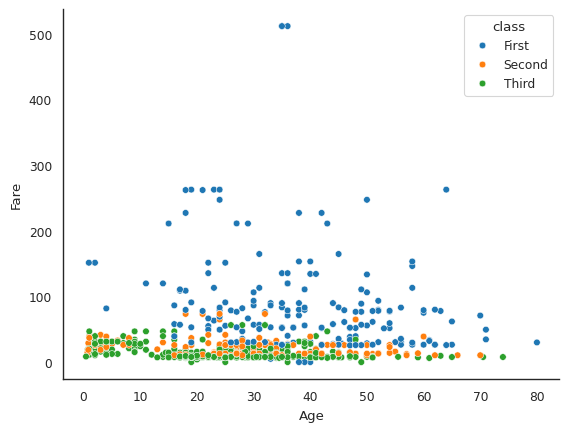

In [26]:
plot4 = sns.scatterplot(data=lab3_data, x='age', y='fare', hue='class')
plot4.set(xlabel='Age', ylabel='Fare')
sns.despine()

Plot 5

In [27]:
lab3_data_subset=lab3_data[['class','who','fare']]
lab3_data_subset=lab3_data_subset.dropna(how='any')
lab3_data_subsetAverage=lab3_data_subset.groupby(['class','who']).mean()
lab3_data_subsetAverage=lab3_data_subsetAverage.reset_index()
lab3_data_subsetAverage.head()

,class,who,fare
0,First,boy,117.802767
1,First,girl,160.962500
2,First,man,65.951086
3,First,woman,104.317995
4,Second,boy,27.306022


Next, convert this categorical data into matrix data as was shown in the tutorial. The new DataFrame containing the matrix data should be named 'matrix_data'.

In [28]:
    matrix_data = lab3_data_subsetAverage.pivot(index='class', columns='who', values='fare')

Heatmap

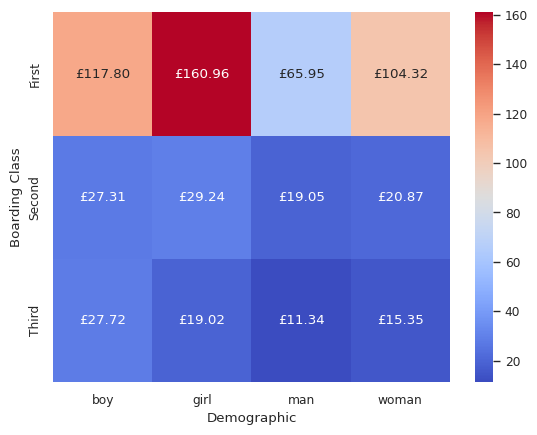

In [29]:
axes5 = sns.heatmap(data=matrix_data, annot=True,fmt='.2f',cmap='coolwarm')
for text in axes5.texts: text.set_text('£' + text.get_text())
plot5 =axes5.set(xlabel='Demographic', ylabel='Boarding Class', xticklabels=['boy','girl','man','woman'])